In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [50]:
names=pd.read_csv('spambase.names', skiprows=57, sep=':\s+', engine='python', names=['attr',''])
names=names['attr']
names= list(names)
names.append('spam_type')
names

['word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 'char_freq_!',
 'char_freq_$',
 'char_freq_#',
 'capital_run_length_average',
 'capital_run_length_longest',
 'capital_run_length_total',
 'spam_type']

In [4]:
dataframe=pd.read_csv('spambase.data', names=names, header=None)

In [5]:
print(dataframe.head)

<bound method NDFrame.head of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32         

In [7]:
dataframe.describe

<bound method NDFrame.describe of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32     

In [6]:
print('Cleaning data')

Cleaning data


In [8]:
print(dataframe.duplicated().value_counts())

False    4210
True      391
dtype: int64


In [10]:
dataframe = dataframe.drop_duplicates()

In [11]:
dataframe.head

<bound method NDFrame.head of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32         

In [12]:
dataframe.isna().sum().sum()

0

In [13]:
X = dataframe.drop(columns=['spam_type'])
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [14]:
Y = dataframe['spam_type']
Y

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: spam_type, Length: 4210, dtype: int64

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1, test_size=0.3)

In [61]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [62]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(scaled_data)

Text(0, 0.5, 'Cumulative explained variance')

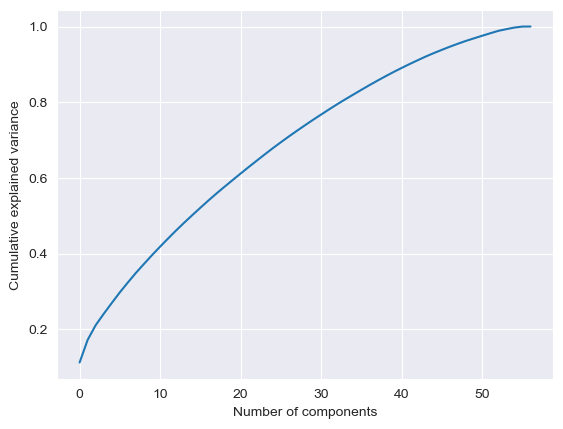

In [63]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [19]:
pca = PCA(n_components=2)
x_pca = pca.fit(scaled_data)
X_test_pca = pca.fit(X_test_scaled)

In [20]:
x_pca = pca.transform(scaled_data)
X_test_pca = pca.transform(X_test_scaled)

print(scaled_data.shape)
print(x_pca.shape)

(3368, 57)
(3368, 2)


In [21]:
x_pca

array([[ 0.66788927, -0.52254124],
       [-0.08851826, -0.35075565],
       [-0.63387414, -0.40646074],
       ...,
       [-1.4112461 ,  0.29352141],
       [-0.7009475 , -0.06772774],
       [-1.38802777,  0.04431178]])

In [22]:
X_test_pca

array([[ 1.26005108, -0.17263992],
       [-1.09385805,  0.04086132],
       [-0.93329399, -0.01963362],
       ...,
       [-0.24350141, -0.57161663],
       [ 6.54406259,  0.11818755],
       [-1.54679627,  0.07918385]])

Text(0, 0.5, '2nd PCA')

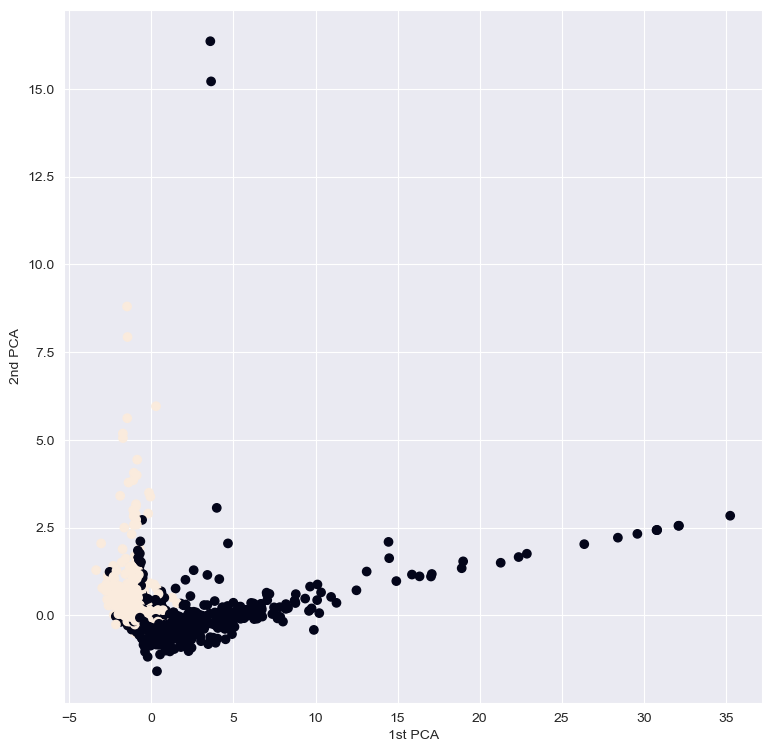

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9,9))
plt.scatter(x_pca[:,0],x_pca[:,1], c= Y_train)
plt.xlabel('1st PCA')
plt.ylabel('2nd PCA')

In [24]:
stand_X=StandardScaler()
X_train = stand_X.fit_transform(X_train)
X_test = stand_X.transform(X_test)

In [55]:
len(Y_test)

842

In [27]:
import math
print(math.sqrt(len(Y_test)))

29.017236257093817


In [28]:
classi = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [29]:
classi.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean')

In [30]:
knn.fit(x_pca, Y_train)

KNeighborsClassifier(metric='euclidean')

In [31]:
Y_predict= classi.predict(X_test)
Y_predict

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,

In [32]:
y_pca_predict =knn.predict(X_test_pca)
y_pca_predict

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,

In [33]:
cm = confusion_matrix(Y_test,Y_predict)
print(cm)

[[478  41]
 [ 49 274]]


In [34]:
pca_cm = confusion_matrix(Y_test,y_pca_predict)
print(pca_cm)

[[473  46]
 [ 54 269]]


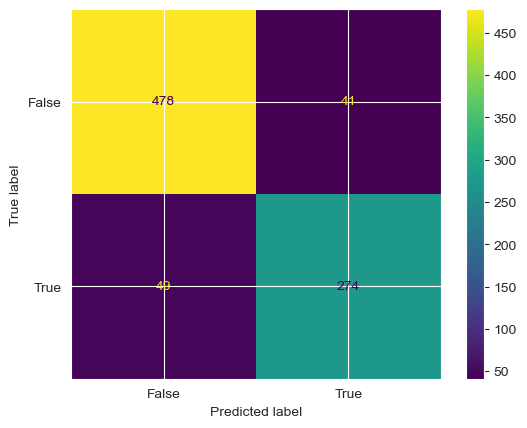

In [35]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True])

cm_display.plot()
plt.show()

<Axes: >

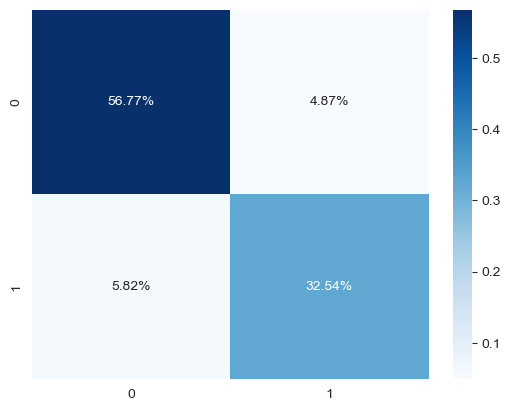

In [57]:
import seaborn as sns
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

In [37]:
knn_f1Score = f1_score(Y_test,Y_predict)
knn_f1Score

0.8589341692789968

In [38]:
knn_pca_f1Score = f1_score(Y_test,y_pca_predict)
knn_pca_f1Score

0.8432601880877743

In [39]:
knn_accuracy = accuracy_score(Y_test,Y_predict)
knn_accuracy

0.8931116389548693

In [40]:
knn_pca_accuracy = accuracy_score(Y_test,y_pca_predict)
knn_pca_accuracy

0.8812351543942993

In [41]:
DT_classi = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=29, min_samples_leaf=57)
DT_classi.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=29, min_samples_leaf=57,
                       random_state=1)

In [42]:
DT_Y_predict = DT_classi.predict(X_test)
DT_Y_predict

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,

In [43]:
DT_cm = confusion_matrix(Y_test,DT_Y_predict)
print(DT_cm)

[[466  53]
 [ 46 277]]


<Axes: >

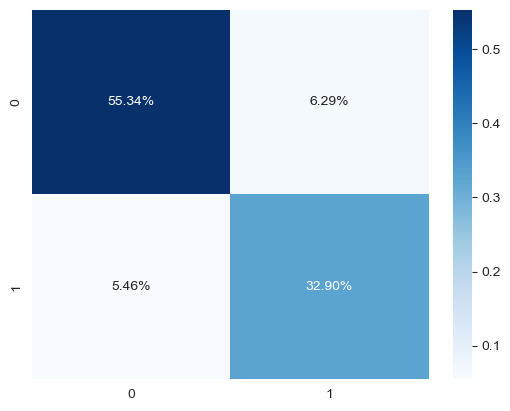

In [44]:
sns.heatmap(DT_cm/np.sum(DT_cm), annot=True,
            fmt='.2%', cmap='Blues')

In [45]:
DT_f1Score = f1_score(Y_test,DT_Y_predict)
DT_f1Score

0.8483920367534455

In [46]:
DT_accuracy = accuracy_score(Y_test,DT_Y_predict)
DT_accuracy

0.8824228028503563

In [47]:
print('KNN f1 Score ::',knn_f1Score)
print('KNN accuracy ::',knn_accuracy)
print('\n')
print('Decision Tree f1 Score:: ',DT_f1Score)
print('Decision Tree accuracy score:: ',DT_accuracy)

KNN f1 Score :: 0.8589341692789968
KNN accuracy :: 0.8931116389548693


Decision Tree f1 Score::  0.8483920367534455
Decision Tree accuracy score::  0.8824228028503563
